Tommaso Peritore

# Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

Find good (& reasonable) choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Check your NN model by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

## Solution

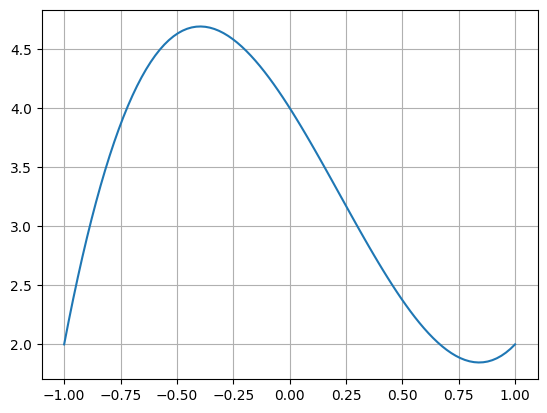

In [130]:
# function we are trying to fit with the DNN
import numpy as np
import matplotlib.pyplot as plt

def f(x):
	return 4-3*x-2*x**2+3*x**3

plot_x = np.linspace(-1,1,100)
plot_y = f(plot_x)
plt.plot(plot_x,plot_y)
plt.grid(True)
plt.show()

In [131]:
# target parameters of f(x) = a + b*x + c*x^2 + d*x^3
a = 4
b = -3
c = -2
d = 3

def f(x):
	return a + b*x + c*x**2 + d*x**3

In [132]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = f(x_valid) # ideal (target) linear function

sigma = 1 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(f(x_train), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(f(x_valid), sigma)

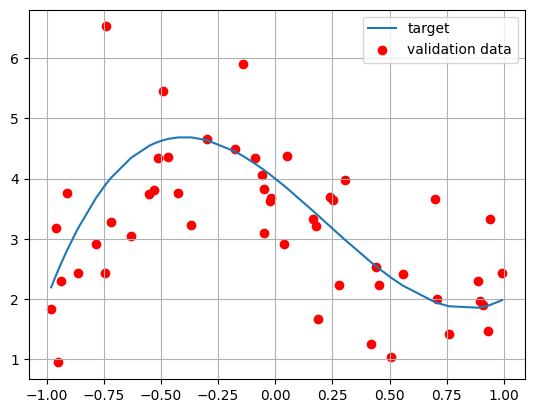

In [133]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [373]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import optimizers, losses, metrics

#from tensorflow.keras import backend as K
#from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(32, input_shape=(1,), activation='selu'))
model.add(Dense(64, activation='selu'))
model.add(Dense(64, activation='selu'))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
tf.keras.optimizers.legacy.Adadelta(learning_rate=1.0, rho=0.95, epsilon=None)
model.compile(optimizer='sgd',       # stochastic gradient descent
              loss=losses.CategoricalCrossentropy(),
              metrics=['categorical_accuracy'])  # an optional list of metrics

In [374]:
# get a summary of our composed model
model.summary()

Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_168 (Dense)           (None, 32)                64        
                                                                 
 dense_169 (Dense)           (None, 64)                2112      
                                                                 
 dense_170 (Dense)           (None, 64)                4160      
                                                                 
 dense_171 (Dense)           (None, 1)                 65        
                                                                 
Total params: 6401 (25.00 KB)
Trainable params: 6401 (25.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [375]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
 1/32 [..............................] - ETA: 4s - loss: 3.6857e-07 - categorical_accuracy: 1.0000

/Users/tommasoperitore/anaconda3/envs/tf/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


32/32 [==============================] - 0s 3ms/step - loss: 4.0440e-07 - categorical_accuracy: 1.0000 - val_loss: 3.7689e-07 - val_categorical_accuracy: 1.0000
Epoch 2/30
32/32 [==============================] - 0s 968us/step - loss: 4.0440e-07 - categorical_accuracy: 1.0000 - val_loss: 3.7689e-07 - val_categorical_accuracy: 1.0000
Epoch 3/30
32/32 [==============================] - 0s 842us/step - loss: 4.0440e-07 - categorical_accuracy: 1.0000 - val_loss: 3.7689e-07 - val_categorical_accuracy: 1.0000
Epoch 4/30
32/32 [==============================] - 0s 807us/step - loss: 4.0440e-07 - categorical_accuracy: 1.0000 - val_loss: 3.7689e-07 - val_categorical_accuracy: 1.0000
Epoch 5/30
32/32 [==============================] - 0s 868us/step - loss: 4.0440e-07 - categorical_accuracy: 1.0000 - val_loss: 3.7689e-07 - val_categorical_accuracy: 1.0000
Epoch 6/30
32/32 [==============================] - 0s 872us/step - loss: 4.0440e-07 - categorical_accuracy: 1.0000 - val_loss: 3.7689e-07 - va

In [376]:
# return weights and biases
model.get_weights()

[array([[ 0.31563425, -0.224595  ,  0.2612301 , -0.2715657 ,  0.33108425,
         -0.17555091, -0.04410434,  0.3795582 ,  0.11717147, -0.03386617,
          0.00154364,  0.17723739, -0.22018988, -0.19692077, -0.11303914,
          0.23172814, -0.00611374, -0.03682452, -0.4063315 , -0.13928774,
         -0.19167389,  0.182078  , -0.30856508,  0.06909519,  0.32181692,
          0.05296245, -0.39082736, -0.275855  , -0.04837689, -0.31230938,
          0.3068893 ,  0.1231311 ]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 array([[-0.13485217,  0.10775864, -0.17923892, ..., -0.1647355 ,
         -0.01294398, -0.04417664],
        [ 0.00719029,  0.16306794, -0.19879419, ..., -0.17891979,
         -0.24941939,  0.11686963],
        [-0.18918657,  0.1970365 ,  0.20562583, ...,  0.03267181,
          0.02536267, -0.11856562],
        ...,
        [ 0.2430

In [377]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 7ms/step - loss: 3.7689e-07 - categorical_accuracy: 1.0000

Test loss: 3.7688971588067943e-07
Test accuracy: 1.0


In [378]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 1ms/step - loss: 3.9556e-07 - categorical_accuracy: 1.0000

Test loss: 3.955618694817531e-07
Test accuracy: 1.0


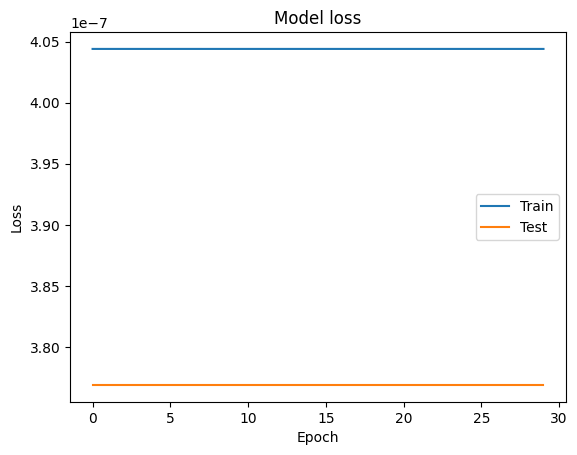

In [379]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

4/4 [==============================] - 0s 3ms/step


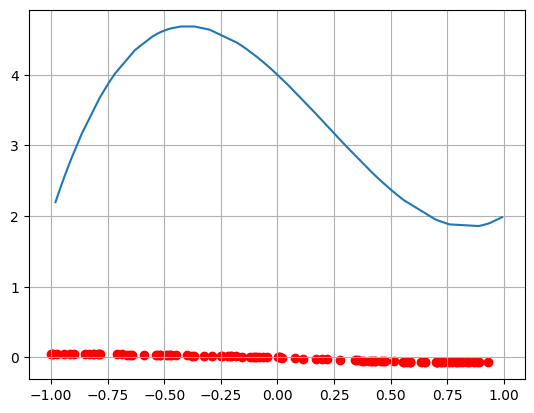

In [380]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted, color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()